# Leer datasets

In [45]:
import pandas as pd
import numpy as np

wine = pd.read_csv('../data/wine.csv')
wine["color"] = np.where(wine["color"] == "red", 1, 0)
print(wine.shape)
print(wine.columns)
print(wine.dtypes)
wine.head()

(6497, 14)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
good                      int64
color                     int64
dtype: object


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1


# Realizamos los clusters

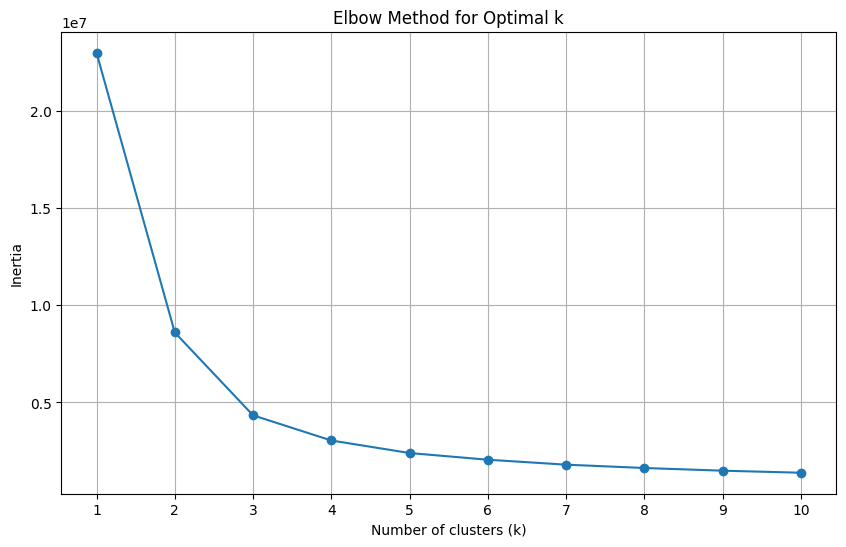

In [46]:
#hagamos metodo del codo para determinar el numero de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method(data, max_k=10):
    inertia = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.grid()
    plt.show()
# Aplicar el método del codo
elbow_method(wine)

In [47]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(wine)
kmeans_labels = kmeans.labels_
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(wine)
dbscan_labels = dbscan.labels_
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(wine)
gmm_labels = gmm.predict(wine)

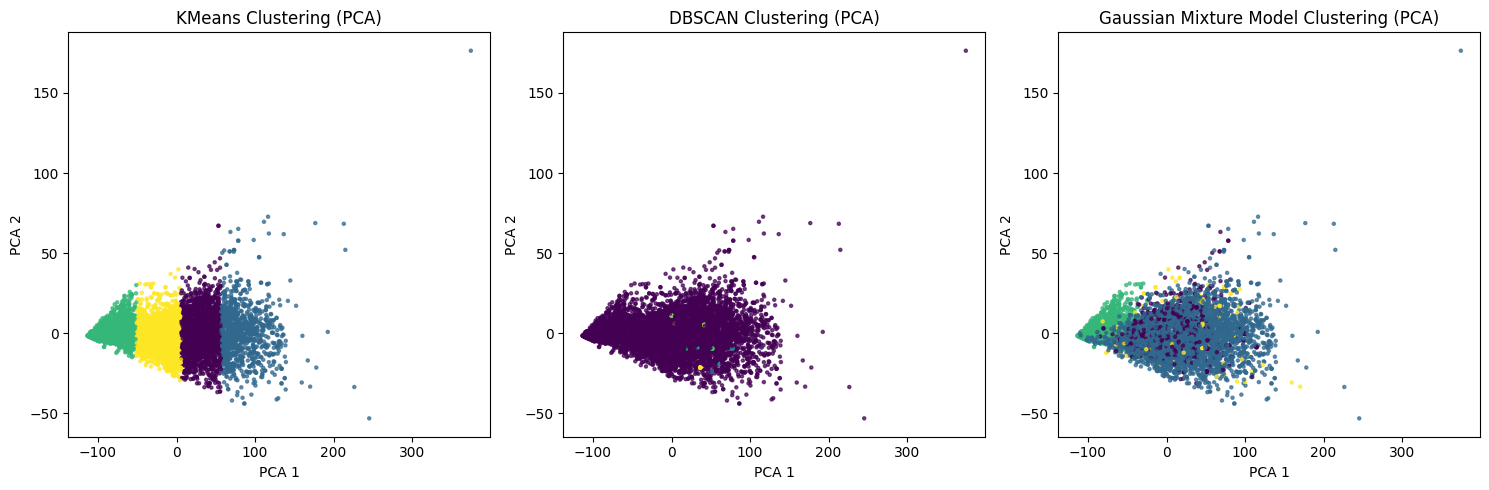

In [48]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2, random_state=42)
wine_pca = pca.fit_transform(wine)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=kmeans_labels, cmap='viridis', s=5, alpha=0.7)
plt.title('KMeans Clustering (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 3, 2)
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=dbscan_labels, cmap='viridis', s=5, alpha=0.7)
plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 3, 3)
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=gmm_labels, cmap='viridis', s=5, alpha=0.7)
plt.title('Gaussian Mixture Model Clustering (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(wine, kmeans_labels)
dbscan_silhouette = silhouette_score(wine, dbscan_labels)
gmm_silhouette = silhouette_score(wine, gmm_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette:.2f}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')
print(f'Gaussian Mixture Model Silhouette Score: {gmm_silhouette:.2f}')

KMeans Silhouette Score: 0.45
DBSCAN Silhouette Score: -0.52
Gaussian Mixture Model Silhouette Score: 0.05


# Interpretar

In [50]:
import sys
sys.path.append('..')
from ripper import MultiClassRipperClassifier
from dsgd import DSClassifierMultiQ
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree as sk_tree

## Kmeans

In [51]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(wine, kmeans_labels, test_size=0.2, random_state=42)


In [52]:
#muestrame los centros de los clusters
centers = kmeans.cluster_centers_
print("KMeans Cluster Centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

KMeans Cluster Centers:
Cluster 0: [6.88709109e+00 2.82871163e-01 3.37428284e-01 6.69982386e+00
 4.82737796e-02 3.70578762e+01 1.44182687e+02 9.94408120e-01
 3.19455964e+00 4.91318571e-01 1.03986395e+01 5.91997987e+00
 2.32511324e-01 2.81831907e-02]
Cluster 1: [6.97277628e+00 2.93737646e-01 3.54195867e-01 9.30714286e+00
 5.17879605e-02 5.06810422e+01 1.97451482e+02 9.96271748e-01
 3.18205750e+00 5.15148248e-01 9.71684636e+00 5.56064690e+00
 8.53548967e-02 1.79694519e-03]
Cluster 2: [ 8.26693548  0.49889663  0.27073314  2.44428152  0.08198754 12.625
 33.60923754  0.99620996  3.29936217  0.63852639 10.57576979  5.67961877
  0.15249267  0.90395894]
Cluster 3: [6.96330546e+00 3.13487457e-01 3.12931628e-01 4.11180521e+00
 4.85297590e-02 2.51158387e+01 9.83251353e+01 9.93100959e-01
 3.20759961e+00 5.07176586e-01 1.09507788e+01 5.95327103e+00
 2.51844565e-01 1.51500246e-01]


In [53]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.95


In [54]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
ripper.print_rules()

DBSCAN Ripper Rules: 57
DBSCAN Ripper Rules: 34

Reglas para clase: 0
[[totalsulfurdioxide=132.0-148.0] V [totalsulfurdioxide=148.0-165.0] V [totalsulfurdioxide=118.0-132.0^freesulfurdioxide=38.0-45.0] V [totalsulfurdioxide=118.0-132.0^freesulfurdioxide=34.0-38.0^good=1] V [totalsulfurdioxide=118.0-132.0^sulphates=0.41-0.45^citricacid=0.31-0.34] V [totalsulfurdioxide=118.0-132.0^freesulfurdioxide=34.0-38.0^alcohol=<9.1] V [totalsulfurdioxide=118.0-132.0^freesulfurdioxide=45.0-54.0] V [totalsulfurdioxide=118.0-132.0^density=0.9907-0.9918^freesulfurdioxide=29.0-34.0] V [totalsulfurdioxide=118.0-132.0^freesulfurdioxide=34.0-38.0^fixedacidity=<6.0] V [totalsulfurdioxide=118.0-132.0^freesulfurdioxide=29.0-34.0] V [totalsulfurdioxide=118.0-132.0^freesulfurdioxide=20.0-24.0^good=0^volatileacidity=0.29-0.32] V [totalsulfurdioxide=118.0-132.0^alcohol=10.7-11.1^freesulfurdioxide=24.0-29.0] V [totalsulfurdioxide=118.0-132.0^freesulfurdioxide=34.0-38.0^quality=5] V [totalsulfurdioxide=118.0-132.0^

Decision Tree Accuracy: 0.96


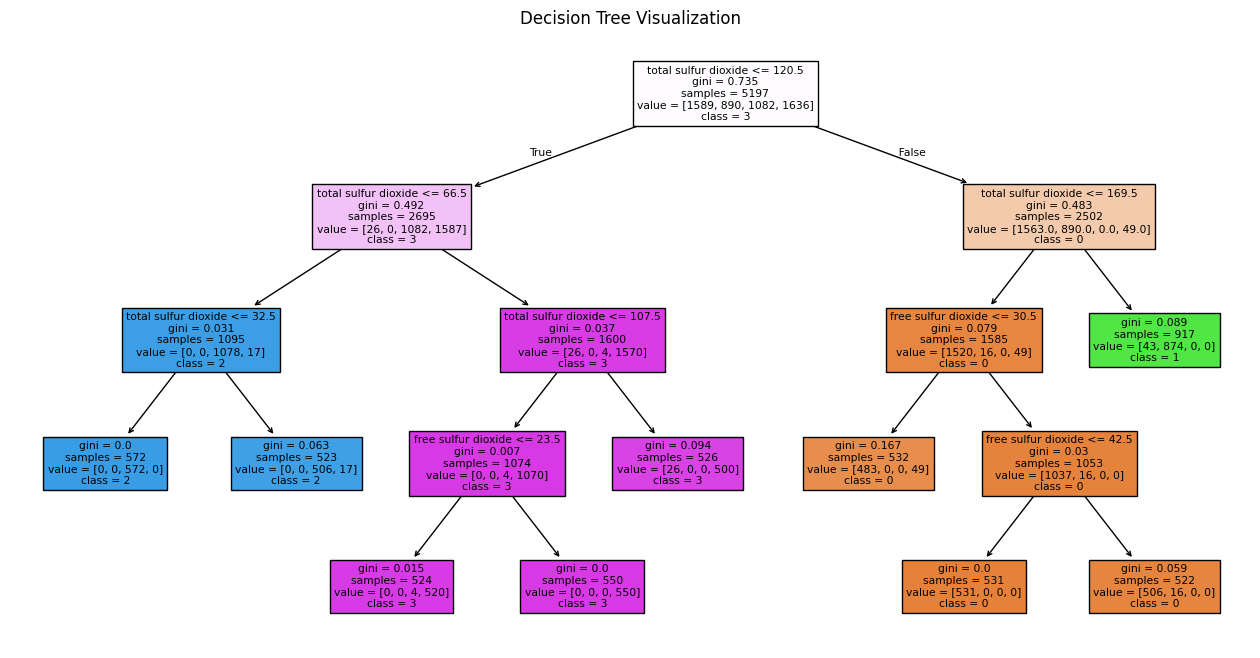

In [55]:
tree = DecisionTreeClassifier(random_state=44, max_depth=5, min_samples_leaf=5, min_weight_fraction_leaf=0.1)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(16, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=wine.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [56]:
ds = DSClassifierMultiQ(4, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=wine.columns.tolist())


Optimization started

Training time: 561.14s, epochs: 200

Least training loss reached: 0.051


In [57]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.936] R26: 115.713 < total sulfur dioxide < 153.577
			0: 0.936	1: 0.000	2: 0.000	3: 0.000	Unc: 0.064

	[0.637] R50: color = 0.0
			0: 0.417	1: 0.297	2: 0.000	3: 0.257	Unc: 0.028

	[0.568] R22: 30.565 < free sulfur dioxide < 42.327
			0: 0.338	1: 0.265	2: 0.000	3: 0.352	Unc: 0.045

	[0.529] R23: free sulfur dioxide > 42.327
			0: 0.297	1: 0.590	2: 0.000	3: 0.057	Unc: 0.057

	[0.465] R42: 10.484 < alcohol < 11.287
			0: 0.249	1: 0.000	2: 0.429	3: 0.191	Unc: 0.131

	[0.425] R21: 18.804 < free sulfur dioxide < 30.565
			0: 0.210	1: 0.000	2: 0.156	3: 0.492	Unc: 0.141

	[0.393] R27: total sulfur dioxide > 153.577
			0: 0.155	1: 0.843	2: 0.000	3: 0.000	Unc: 0.002

	[0.363] R36: sulphates < 0.431
			0: 0.171	1: 0.000	2: 0.379	3: 0.221	Unc: 0.229

	[0.342] R29: 0.993 < density < 0.995
			0: 0.213	1: 0.000	2: 0.199	3: 0.139	Unc: 0.450

	[0.339] R43: alcohol > 11.287
			0: 0.152	1: 0.001	2: 0.490	3: 0.111	Unc: 0.245

	[0.338] R1: 6.334 < fixed acidity < 7.2

In [58]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.84


## DBSCAN

In [59]:
#dividir los datos en entrenamiento y prueba
n_clusters = len(np.unique(dbscan_labels))
max_label = np.max(dbscan_labels)
dbscan_labels = np.where(dbscan_labels == -1, max_label + 1, dbscan_labels)  # Assign a new label for noise points
X_train, X_test, y_train, y_test = train_test_split(wine, dbscan_labels, test_size=0.2, random_state=42)


In [60]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.99


In [61]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
ripper.print_rules()

DBSCAN Ripper Rules: 1
DBSCAN Ripper Rules: 1

Reglas para clase: 0
[[quality=8^totalsulfurdioxide=>187.0]]

Reglas para clase: 1
[[volatileacidity=0.18-0.21^totalsulfurdioxide=>187.0^quality=7]]

Reglas para clase: 2
[[alcohol=9.4-9.6^pH=3.02-3.08^fixedacidity=7.2-7.5^volatileacidity=0.32-0.37]]

Reglas para clase: 3
[[freesulfurdioxide=15.0-20.0^totalsulfurdioxide=165.0-187.0^fixedacidity=6.5-6.8]]

Reglas para clase: 4
[[citricacid=0.34-0.37^fixedacidity=6.0-6.3^density=>0.9984]]

Reglas para clase: 5
[[chlorides=0.044-0.047^fixedacidity=7.2-7.5^residualsugar=>13.0]]

Reglas para clase: 6
[[citricacid=0.29-0.31^density=>0.9984^chlorides=0.047-0.051]]

Reglas para clase: 7
[[fixedacidity=6.8-7.0^alcohol=<9.1^volatileacidity=<0.18]]

Reglas para clase: 8
[[totalsulfurdioxide=132.0-148.0^density=0.9974-0.9984^quality=7]]

Reglas para clase: 9
[[citricacid=0.29-0.31^residualsugar=>13.0^sulphates=0.41-0.45]]

Reglas para clase: 10
[[pH=3.21-3.25^density=>0.9984^fixedacidity=<6.0]]

Regla

Decision Tree Accuracy: 0.99


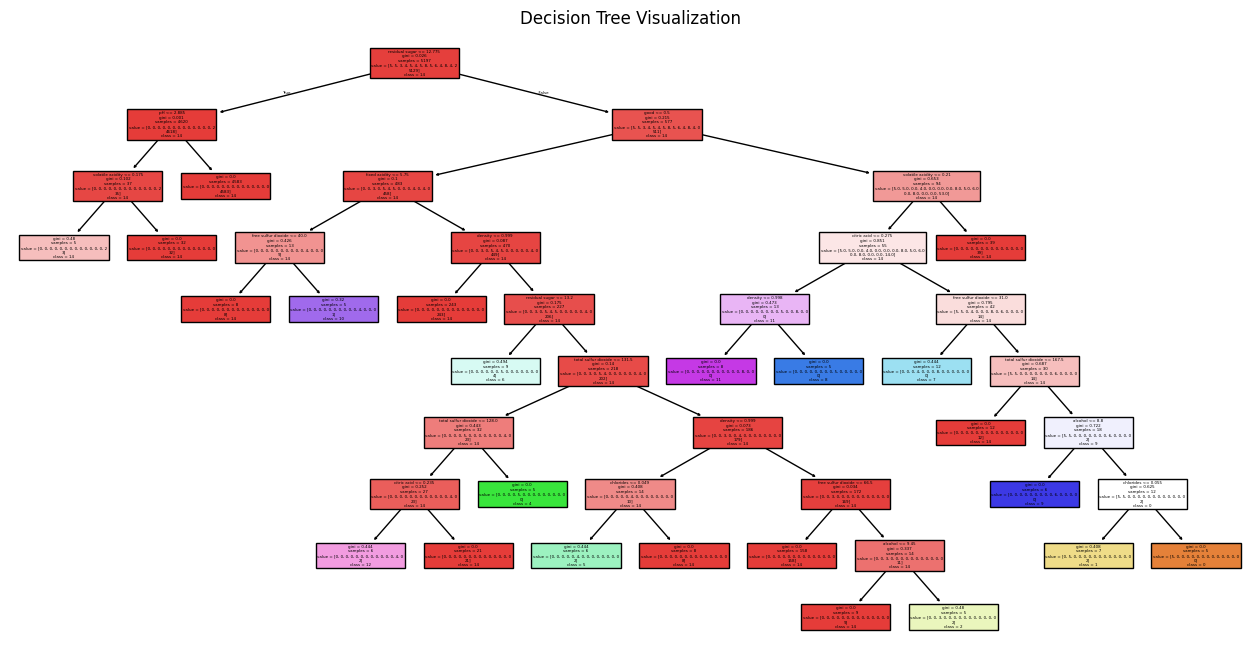

In [62]:
tree = DecisionTreeClassifier(random_state=44, min_samples_leaf=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(16, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=wine.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [63]:
ds = DSClassifierMultiQ(n_clusters, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=wine.columns.tolist())


Optimization started

Training time: 322.53s, epochs: 200

Least training loss reached: 0.002


In [64]:
ds.print_most_important_rules(threshold=0.001)



Most important rules for class 0

	[0.257] R15: residual sugar > 8.707
			0: 0.087	1: 0.062	2: 0.028	3: 0.043	4: 0.027	5: 0.053	6: 0.034	7: 0.057	8: 0.064	9: 0.087	10: 0.024	11: 0.109	12: 0.037	13: 0.021	14: 0.025	Unc: 0.240

	[0.231] R49: good = 1.0
			0: 0.079	1: 0.055	2: 0.019	3: 0.038	4: 0.018	5: 0.027	6: 0.021	7: 0.050	8: 0.057	9: 0.078	10: 0.018	11: 0.099	12: 0.021	13: 0.017	14: 0.080	Unc: 0.322

	[0.230] R47: quality > 6.406
			0: 0.078	1: 0.055	2: 0.019	3: 0.038	4: 0.018	5: 0.027	6: 0.021	7: 0.050	8: 0.057	9: 0.078	10: 0.018	11: 0.098	12: 0.021	13: 0.017	14: 0.077	Unc: 0.327

	[0.227] R4: volatile acidity < 0.228
			0: 0.074	1: 0.054	2: 0.023	3: 0.039	4: 0.022	5: 0.048	6: 0.025	7: 0.050	8: 0.055	9: 0.074	10: 0.025	11: 0.091	12: 0.035	13: 0.023	14: 0.062	Unc: 0.299

	[0.217] R2: 7.203 < fixed acidity < 8.072
			0: 0.073	1: 0.052	2: 0.025	3: 0.023	4: 0.017	5: 0.046	6: 0.030	7: 0.026	8: 0.053	9: 0.072	10: 0.017	11: 0.090	12: 0.020	13: 0.016	14: 0.088	Unc: 0.353

	[0.201] R31: de

In [65]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.99


## GMM

In [66]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(wine, gmm_labels, test_size=0.2, random_state=42)

In [67]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.97


In [68]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
ripper.print_rules()

DBSCAN Ripper Rules: 3
DBSCAN Ripper Rules: 15

Reglas para clase: 0
[[good=1^color=0^density=<0.9907] V [good=1^color=0^density=0.9907-0.9918] V [good=1^color=0]]

Reglas para clase: 1
[[color=0^good=0^chlorides=0.04-0.044] V [color=0^good=0^chlorides=0.051-0.058] V [color=0^good=0^chlorides=0.036-0.04] V [color=0^good=0^chlorides=0.047-0.051] V [color=0^good=0^chlorides=0.031-0.036] V [color=0^good=0^chlorides=0.044-0.047] V [color=0^good=0^chlorides=<0.031] V [chlorides=0.058-0.073^color=0^good=0] V [color=0^good=0^chlorides=0.073-0.086] V [chlorides=>0.086^color=0^volatileacidity=0.44-0.58] V [chlorides=>0.086^color=0^citricacid=0.14-0.23^residualsugar=7.3-9.6] V [chlorides=>0.086^color=0^volatileacidity=0.37-0.44^freesulfurdioxide=15.0-20.0] V [chlorides=>0.086^color=0^totalsulfurdioxide=165.0-187.0^fixedacidity=7.5-7.9] V [chlorides=>0.086^color=0^citricacid=0.14-0.23^quality=5^pH=3.02-3.08] V [chlorides=>0.086^color=0^pH=>3.42]]

Reglas para clase: 2
[[color=1^chlorides=0.073-0.

Decision Tree Accuracy: 0.99


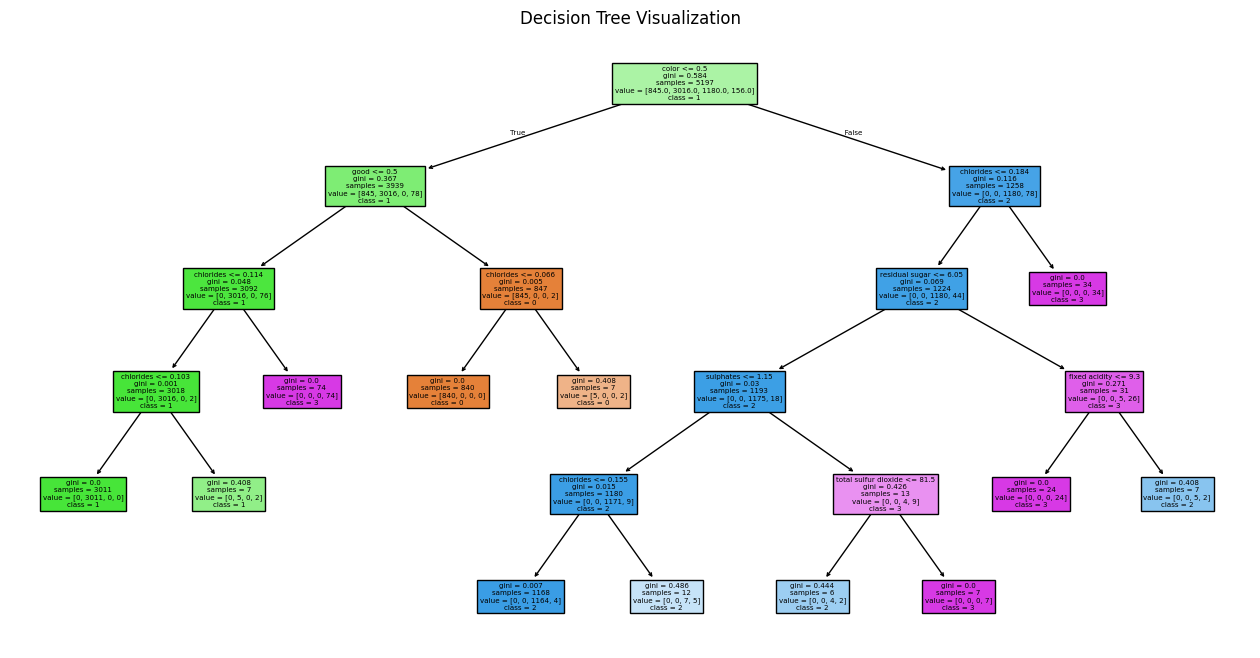

In [69]:
tree = DecisionTreeClassifier(random_state=44, min_samples_leaf=5, max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(16, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=wine.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [70]:
ds = DSClassifierMultiQ(4, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=wine.columns.tolist())


Optimization started

Training time: 124.15s, epochs: 90

Least training loss reached: 0.016


In [71]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.756] R47: quality > 6.406
			0: 0.679	1: 0.000	2: 0.163	3: 0.001	Unc: 0.157

	[0.725] R49: good = 1.0
			0: 0.641	1: 0.000	2: 0.177	3: 0.001	Unc: 0.181

	[0.498] R28: density < 0.993
			0: 0.352	1: 0.340	2: 0.000	3: 0.014	Unc: 0.294

	[0.448] R16: chlorides < 0.032
			0: 0.293	1: 0.394	2: 0.000	3: 0.000	Unc: 0.313

	[0.437] R4: volatile acidity < 0.228
			0: 0.298	1: 0.299	2: 0.000	3: 0.043	Unc: 0.359

	[0.430] R50: color = 0.0
			0: 0.259	1: 0.402	2: 0.000	3: 0.053	Unc: 0.286

	[0.414] R26: 115.713 < total sulfur dioxide < 153.577
			0: 0.283	1: 0.290	2: 0.000	3: 0.033	Unc: 0.393

	[0.414] R15: residual sugar > 8.707
			0: 0.288	1: 0.297	2: 0.000	3: 0.010	Unc: 0.405

	[0.394] R23: free sulfur dioxide > 42.327
			0: 0.279	1: 0.187	2: 0.000	3: 0.092	Unc: 0.442

	[0.337] R25: 77.850 < total sulfur dioxide < 115.713
			0: 0.225	1: 0.238	2: 0.000	3: 0.040	Unc: 0.497

	[0.332] R43: alcohol > 11.287
			0: 0.256	1: 0.000	2: 0.172	3: 0.003	Unc: 0.569

	[

In [72]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.95
